Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 0.2874 - val_loss: 0.2526
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2498 - val_loss: 0.2466
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2426 - val_loss: 0.2386
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2373 - val_loss: 0.2341
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2323 - val_loss: 0.2300
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2295 - val_loss: 0.2282
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2178 - val_loss: 0.2088
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2053 - val_loss: 0.2029
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2007 - val_loss: 0.1990
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1976 - val_lo

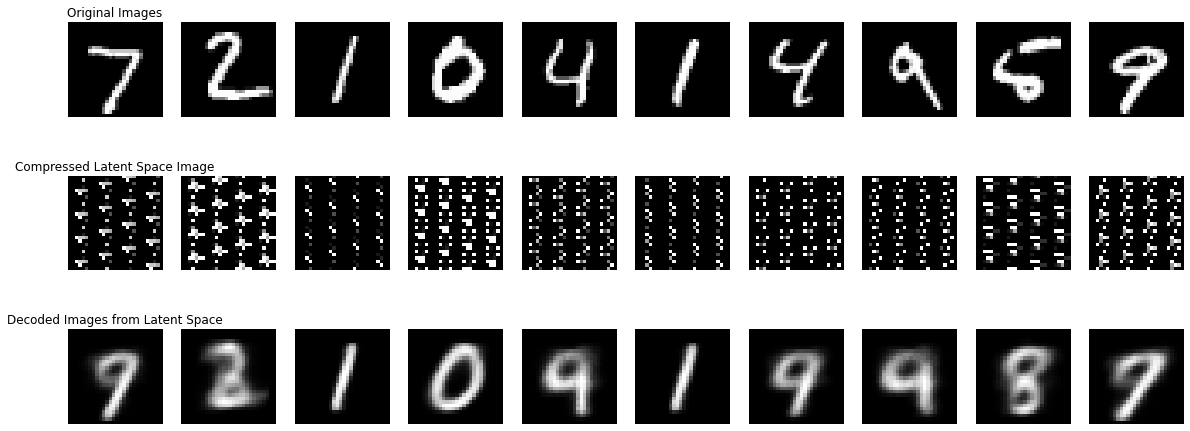

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
tf.get_logger().setLevel('ERROR')

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((-1, 28*28))  # Flatten images to 784 dimensions
x_test = x_test.reshape((-1, 28*28))

# Define the autoencoder architecture

# Encoder
input_layer = layers.Input(shape=(28*28,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)  # Latent space (2D compressed representation)

# Decoder
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(28*28, activation='sigmoid')(decoded)  # Reconstruct the image

# Define the autoencoder model
autoencoder = models.Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_data=(x_test, x_test))

# Create the encoder model to extract the latent space representations
encoder = models.Model(input_layer, encoded)

# Create the decoder model to decode the latent space representations back to images
encoded_input = layers.Input(shape=(2,))
decoder_h = autoencoder.layers[-3](encoded_input)  # 1st layer after encoding
decoder_h = autoencoder.layers[-2](decoder_h)  # 2nd layer after encoding
decoder_output = autoencoder.layers[-1](decoder_h)  # Final layer of decoder
decoder = models.Model(encoded_input, decoder_output)

# Get the encoded features (latent space representation) for the test set
encoded_imgs = encoder.predict(x_test)

# Use the decoder to reconstruct the images from the latent space
decoded_imgs_from_latent = decoder.predict(encoded_imgs)

# Visualize the data during encoding and after decoding
n = 10  # Number of images to display

# Plot original images, encoded representations, and decoded images
plt.figure(figsize=(20, 8))

# Original Images
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.axis('off')
    if i == 0:
        ax.set_title("Original Images")

# Low-Quality Encoded Images (Show compressed representation in latent space)
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n)

    # We simulate "low-quality" by downscaling the original image before encoding
    low_quality_image = x_test[i].reshape(28, 28)

    # Downscale the image to simulate "compression"
    low_quality_image = low_quality_image[::4, ::4]  # Downscale by factor of 4
    low_quality_image = np.resize(low_quality_image, (28, 28))  # Resize it back to original size

    plt.imshow(low_quality_image, cmap="gray")
    ax.axis('off')
    if i == 0:
        ax.set_title("Compressed Latent Space Image")

# Decoded Images from Latent Space (Compressed Images)
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_from_latent[i].reshape(28, 28), cmap="gray")
    ax.axis('off')
    if i == 0:
        ax.set_title("Decoded Images from Latent Space")

# Show the plot
plt.show()
